# [뱀과 사다리 게임](https://www.acmicpc.net/problem/16928)

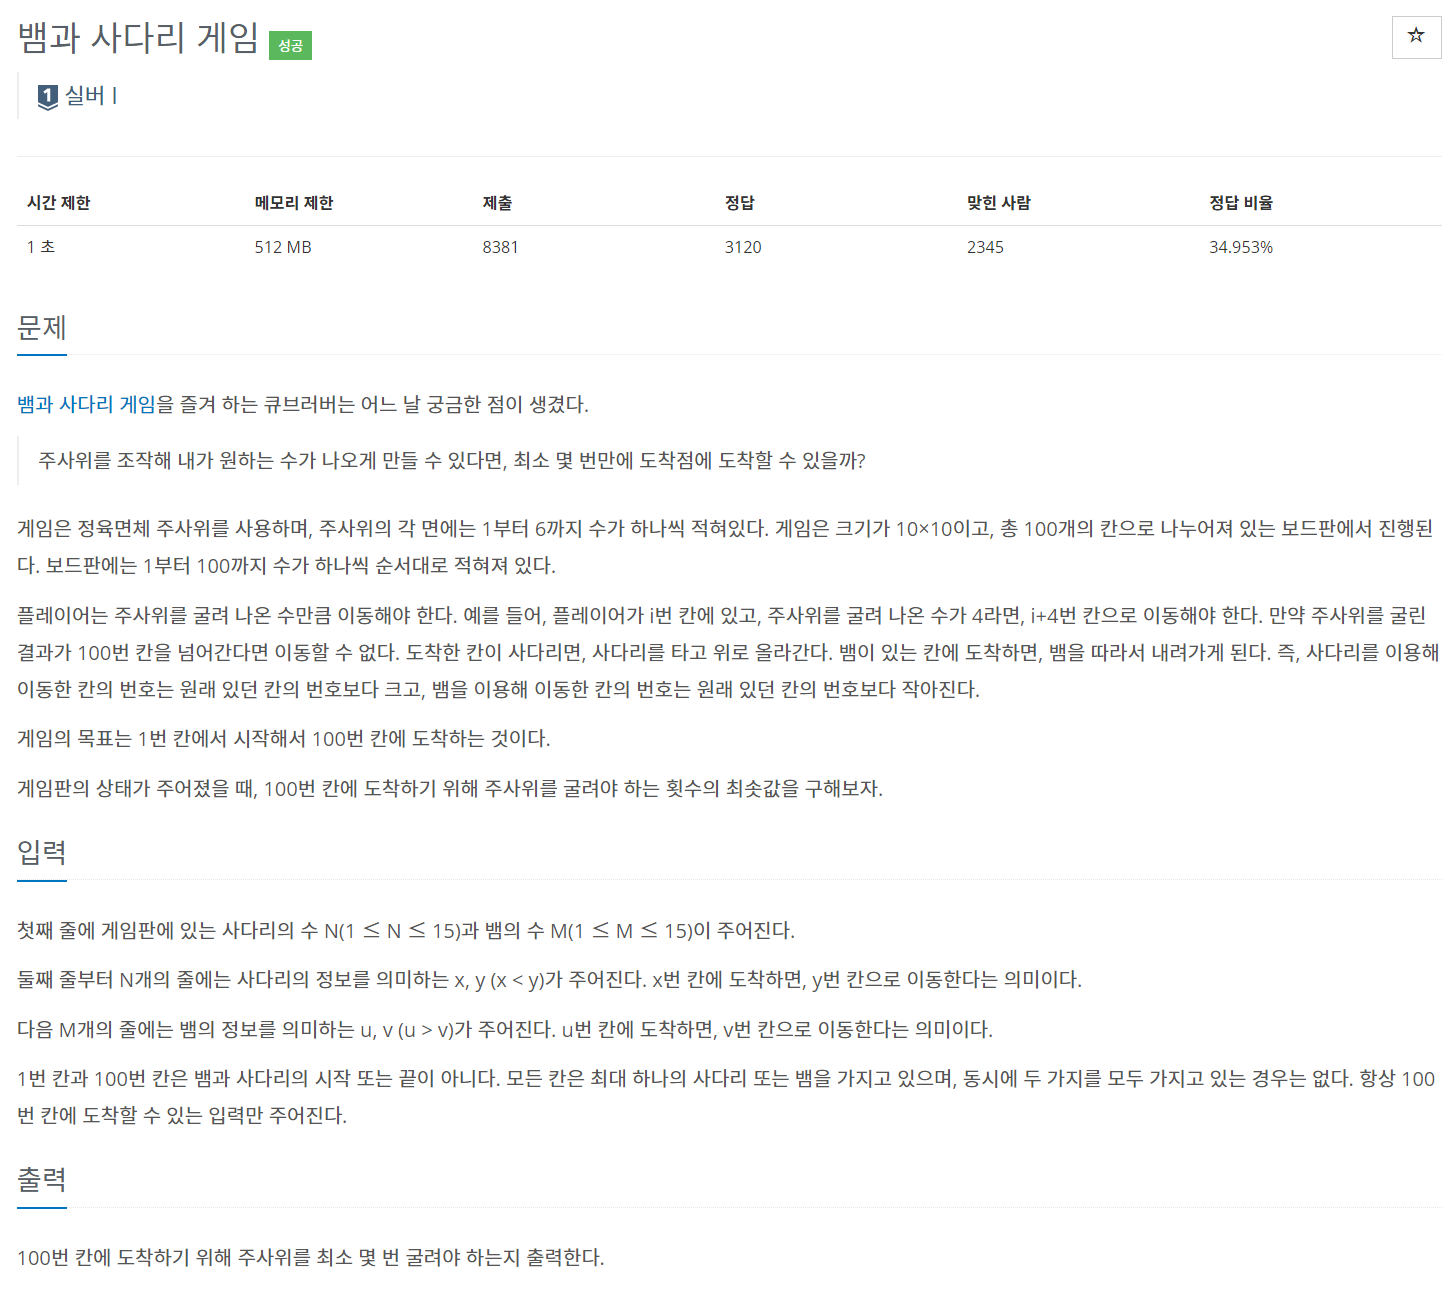

## - 반드시 1번 칸에서 시작하고 100번 칸에 도착한다.

## - 1번 칸과 2번 칸은 무조건 주사위를 돌려서 이동(or 도착)해야 하는 칸임이 보장되어 있다.

## - 칸에 뱀과 사다리가 있다면 무조건 올라타서 이동. → 숫자가 낮아지고 높아지는 건 중요X

<!-- ![](image/16928.png) -->

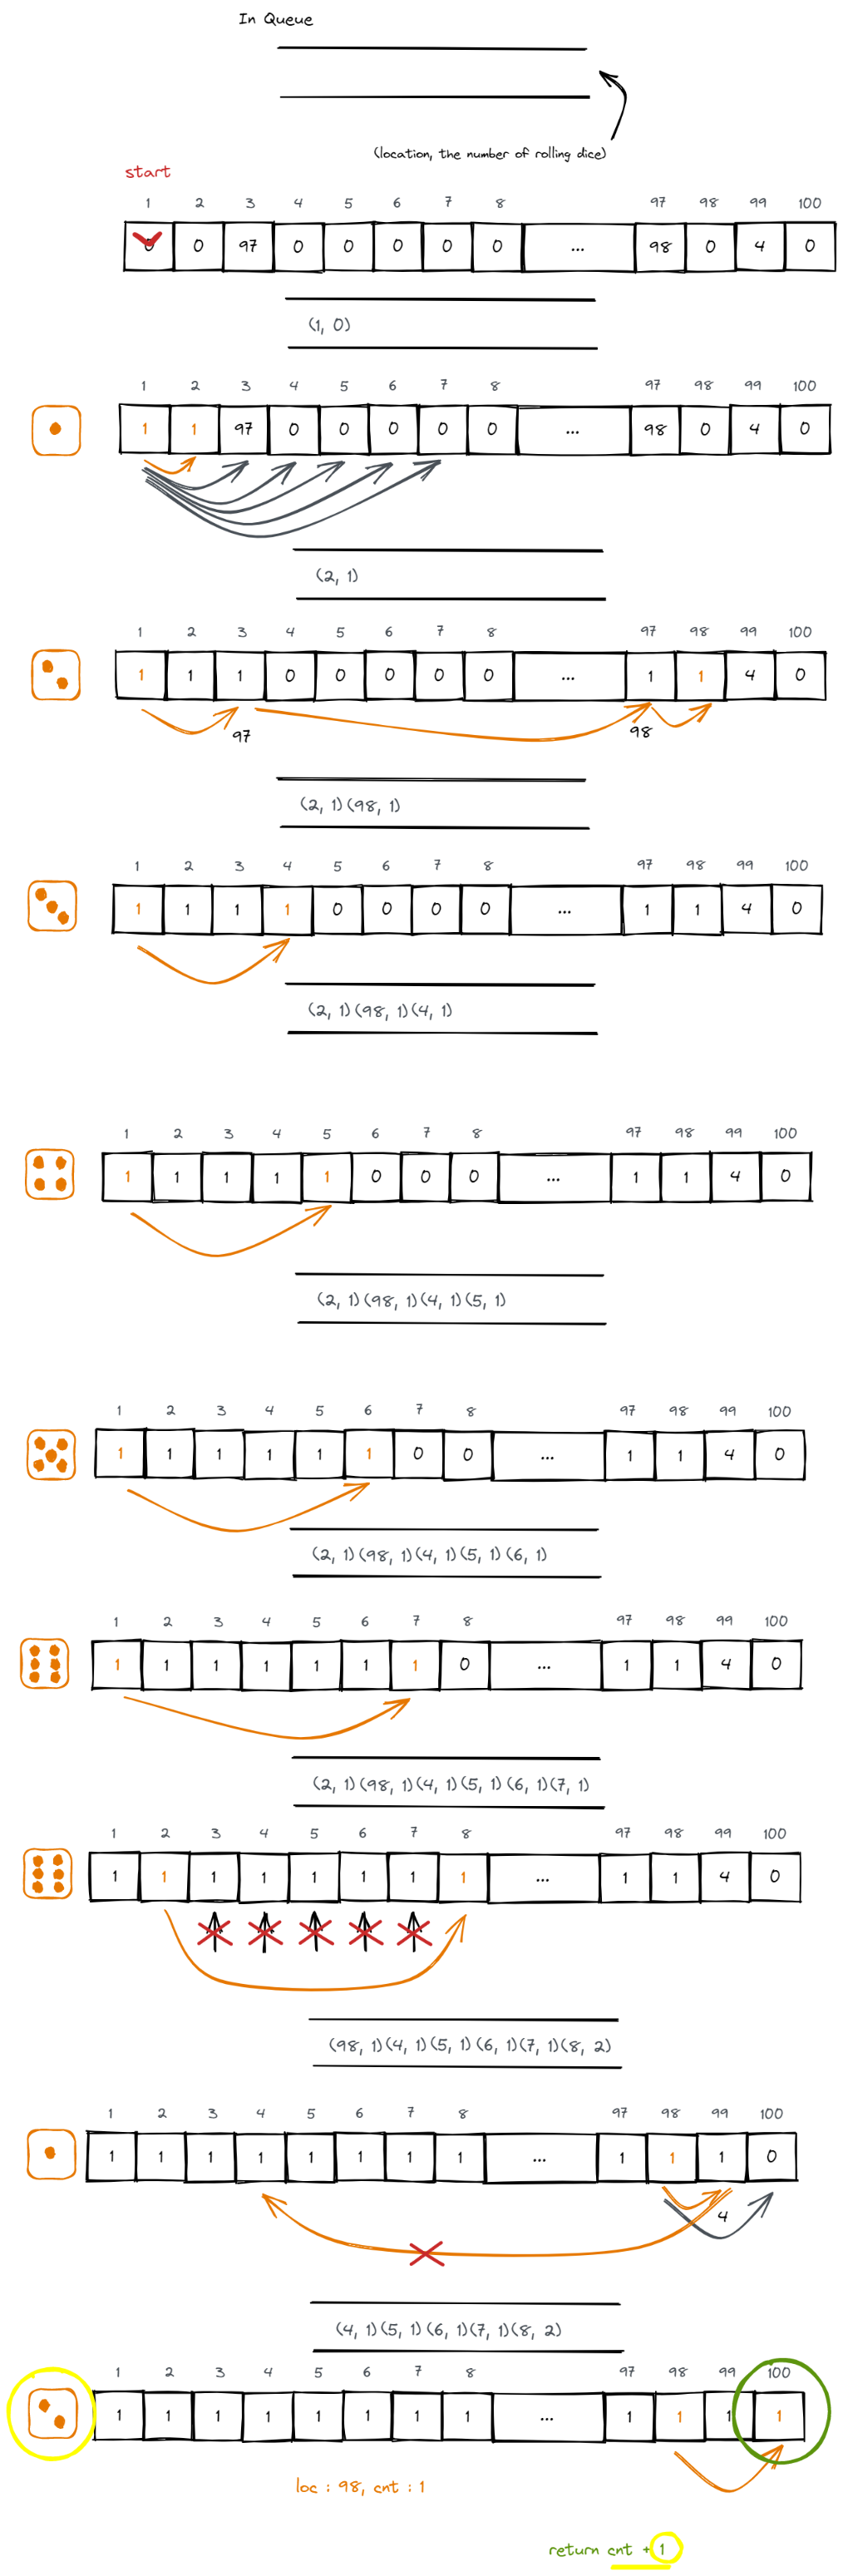

In [ ]:
import sys
from collections import deque

In [ ]:
input = sys.stdin.readline

In [ ]:
graph = [0]*(101)
q = deque()
# 사다리의 수 n, 뱀의 수 m
n, m = map(int, input().split())

# BFS에서 중요한 방문처리는 graph내에서 한꺼번에 처리 가능
# graph는 다음 이동할 칸의 정보와 방문 정보를 저장하도록 설정한다

In [ ]:
for _ in range(n+m):  # 어차피 사다리나 뱀이나 현재 위치를 이동시키는 것이다. 구분이 중요하지 않음.
    fm, to = map(int, input().split())
    graph[fm] = to # 사다리나 뱀이 있다면 그 다음 위치를 저장

# graph의 숫자가 1이면 이미 방문한 곳이다.
# 1번 칸과 100번 칸은 뱀이나 사다리의 시작 또는 끝이 아니라고 했으므로 
# 반드시graph[1] = 0, graph[100] = 0

In [ ]:
graph[1] = 1  # 방문 처리
# q 안에는 멈춰서 주사위를 돌릴 수 있는 칸만이 들어가게 됨.
q.append((1, 0))

while q:
    now, cnt = q.popleft()  # 주사위를 돌릴 현재 위치
    for i in range(1, 7):  # 1부터 6까지
        next = now + i  # 다음 방문 위치
        if next <= 100 and graph[next] != 1:  # 방문한 적이 없을 때
            while graph[next] > 1:  # 이 위치에 방문한 적이 없고, 뱀이나 사다리가 있다면
                temp = graph[next]  # 그 다음으로 이동하는 곳
                graph[next] = 1  # 방문처리
                next = temp
            # 주사위를 돌릴 수 있는 위치
            if next == 100:
                print(cnt+1)
                sys.exit() # 프로그램 종료
            if graph[next] == 0: # (뱀이나 사다리를 통해) 이동한 위치가 이전에 방문한 적이 없다면
                graph[next] = 1
                q.append((next, cnt+1))